In [25]:
import socket
import sys
import time


HOSTNAME = 'target.myrelabs.com'
PORT = 7777

HOST = socket.gethostbyname(HOSTNAME)

TEST_ITERS = 10


def print_clients():
    s.send(index.to_bytes(4, 'little'), 4)
    clients = int.from_bytes(s.recv(4), 'little')
    print('Connected clients: ', clients)

    

def init_socket():
    try:
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        s.connect((HOST, PORT))
    except socket.error as err:
        print('socket err', err)
        sys.exit(1)
    return s


def test(p_index, password):
    result = 0
    digest = p_index.to_bytes(1, 'little') + password
    start = time.time_ns()
    s.send(digest)
    res = s.recv(1)
    end = time.time_ns()
    result += (end - start) / 1_000_000
    return result, res == 1


In [26]:
s = init_socket()
print_clients()

index = 229747
p_index = 0

Connected clients:  2


In [27]:
def run_tests(p_index, password, index):
    results = [0 for _ in range(256)]
    for test_iter in range(TEST_ITERS):
        print('iter ', test_iter)
        for i in range(256):
            password = bytes([i]) + password[1:]
            r, passed = test(0, password)
            results[i] += r / TEST_ITERS
    return results, passed

In [28]:
import matplotlib.pyplot as plt
X = list(range(256))
password = bytes(range(8))

def plot(results):
    plt.plot(X, results)
    plt.show()


iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


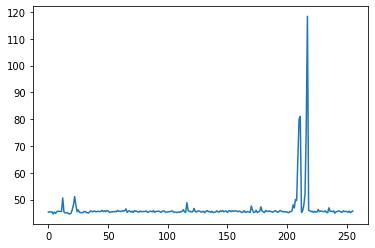

In [29]:
results, passed = run_tests(p_index, password, 0)
plot(results)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


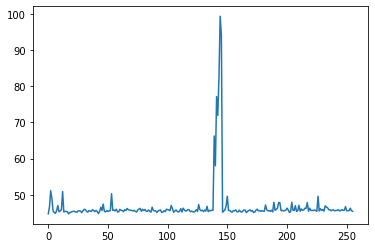

In [31]:
results2, passed = run_tests(p_index, password, 0)
plot(results2)